# Detector sensitivity

In [1]:
import numpy as np

from spectral_sirens.detectors import sensitivity_curves as sc

# PLOT SETTINGS
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
fontSz = 15
fontsz = 13
fontssz = 11

new_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728',
              '#9467bd', '#8c564b', '#e377c2', '#7f7f7f',
              '#bcbd22', '#17becf']

## Power spectral density

We plot the power spectral density

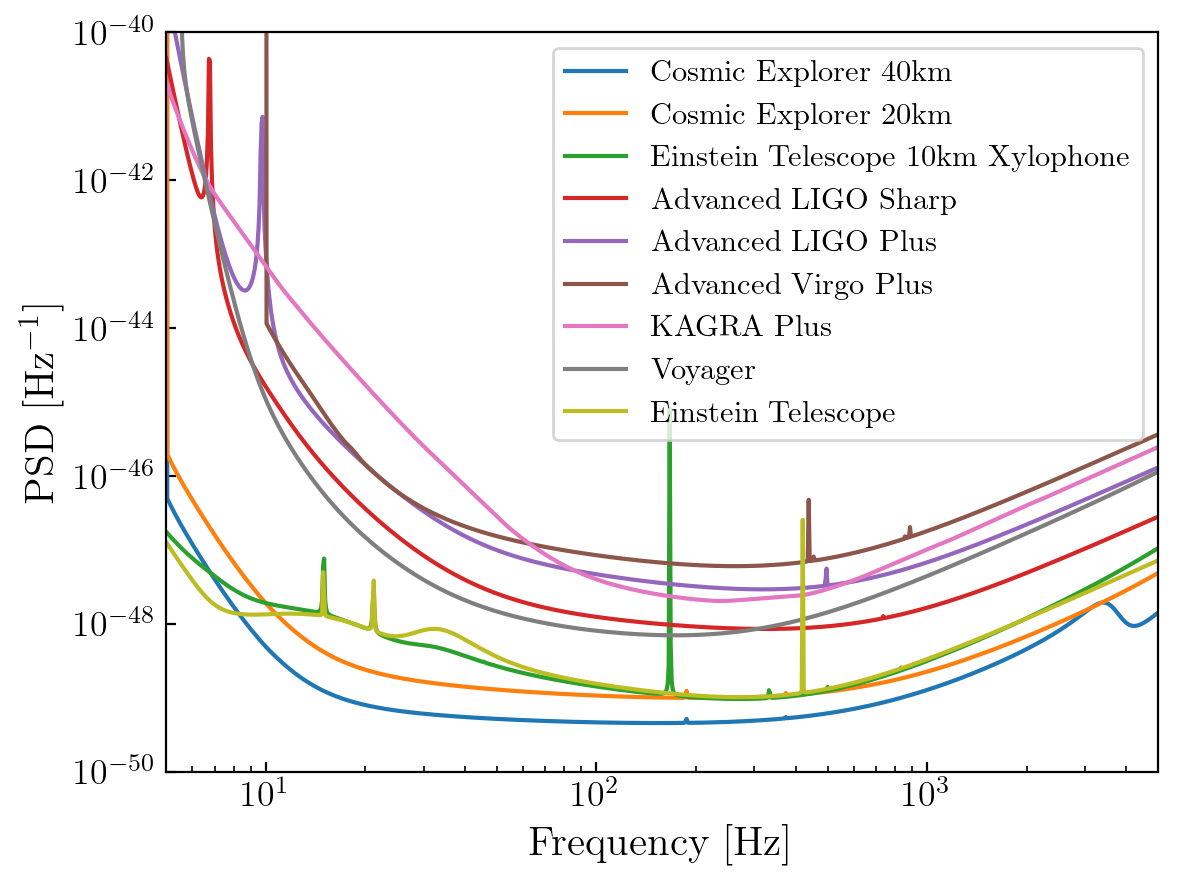

In [2]:

from spectral_sirens.detectors.sensitivity_curves import detectors_list
fmin = 5
fmax = 5000

for detector in detectors_list:
    detector_psd, fmin_d, fmax_d = sc.detector_psd(detector)
    fs = np.logspace(np.log10(fmin), np.log10(fmax), 1000)

    plt.loglog(fs, detector_psd(fs), label=sc.detector_name(detector))

plt.xlabel(r'Frequency [Hz]', fontsize=fontSz)
plt.ylabel(r'PSD [Hz$^{-1}$]', fontsize=fontSz)
plt.tick_params(axis='both',which='both',direction='in',labelsize=fontsz)
plt.legend(fontsize=fontssz)
plt.xlim([fmin, fmax])
plt.ylim([1e-50, 1e-40])
plt.show()

## Computing the signal-to-noise ratio

In [2]:
from spectral_sirens.utils import gwutils

In [3]:
fmin = 10.
Tobs = 1.
detector = 'A#'
based = 'ground'
snr_th = 8.0

mass1 = 10.
mass2 = 10.
DL = 100.

print('SNR in ', detector, 'detector is ', gwutils.snr(mass1,mass2,DL,fmin,Tobs,detector,based))

SNR in  A# detector is  558.4894482592947


In [4]:
from spectral_sirens.detectors.sensitivity_curves import detectors_list

for detector in detectors_list:
    print('SNR in ', detector, 'detector is ', gwutils.snr(mass1,mass2,DL,fmin,Tobs,detector,based))

SNR in  CE-40 detector is  5466.001889638989
SNR in  CE-20 detector is  3240.030227867943
SNR in  ET-10-XYL detector is  2122.1561397317582
SNR in  A# detector is  558.4894482592947
SNR in  A+ detector is  286.5821826792696
SNR in  V+ detector is  229.85947536345375
SNR in  K+ detector is  244.02959231013665
SNR in  Voyager detector is  719.7695240875188
SNR in  ET detector is  2026.0735375013892


## Signal-to-noise ratio averaged over sky positions, orientations and inclinations $p(w)$

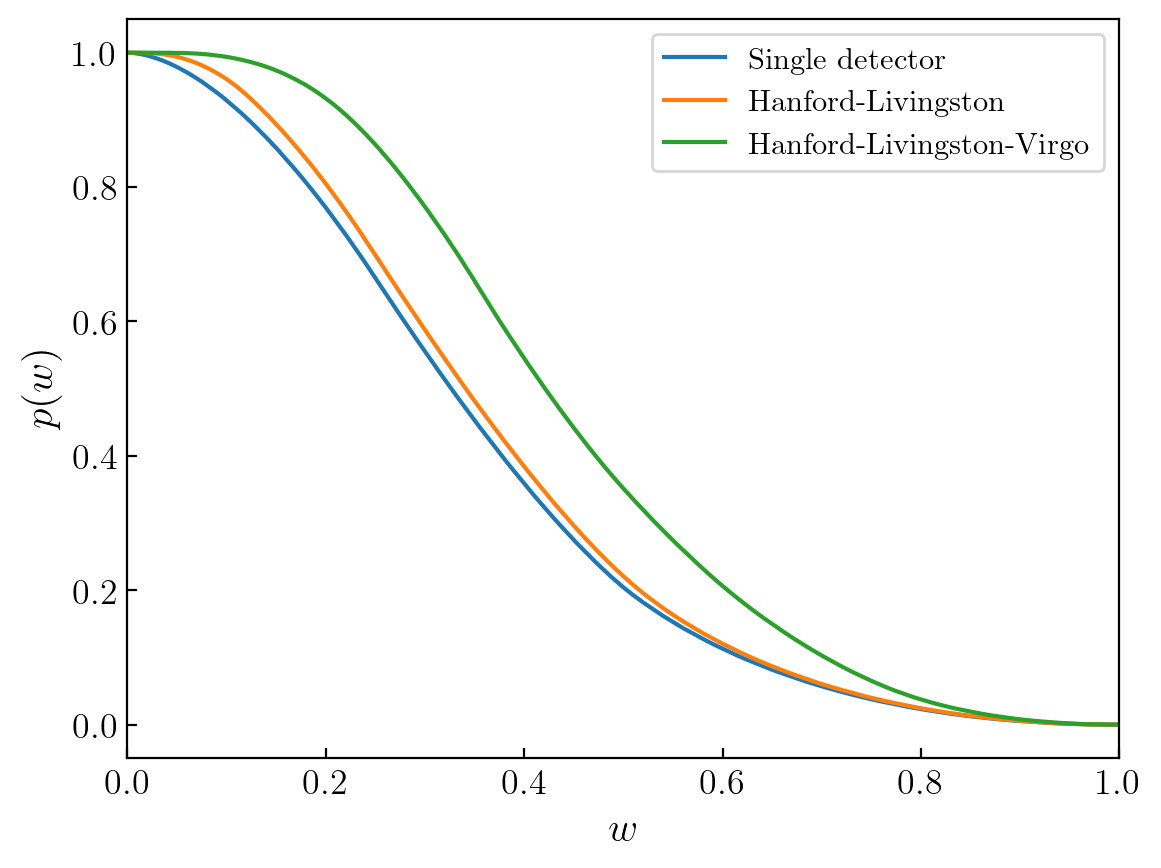

In [6]:
from spectral_sirens.detectors.sensitivity_curves import pw, pw_hl, pw_hlv

w = np.linspace(0,1,1000)
plt.plot(w, pw(w),label='Single detector')
plt.plot(w, pw_hl(w),label='Hanford-Livingston')
plt.plot(w, pw_hlv(w),label='Hanford-Livingston-Virgo')
plt.xlabel(r'$w$', fontsize=fontSz)
plt.ylabel(r'$p(w)$', fontsize=fontSz)
plt.tick_params(axis='both',which='both',direction='in',labelsize=fontsz)
plt.xlim([0, 1])
plt.legend(fontsize=fontssz)
plt.show()